<a href="https://colab.research.google.com/github/rifqrmdhn/TugasAkhir/blob/main/Bismillah_TA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 11.1 MB/s eta 0:00:00


In [ ]:
from mtcnn import MTCNN
import cv2
import numpy as np
import os
import torch
from torchvision import transforms
import random
from google.colab.patches import cv2_imshow  # Menggunakan cv2_imshow dari Google Colab

# Path ke direktori dataset
dataset_dir = '/content/drive/MyDrive/Data TA'

# Fungsi untuk ekstraksi wajah menggunakan MTCNN
def extract_face(image_path):
    image = cv2.imread(image_path)
    detector = MTCNN()
    faces = detector.detect_faces(image)

    if len(faces) > 0:
        x, y, w, h = faces[0]['box']
        face = image[y:y+h, x:x+w]
        return face
    else:
        return None
# Fungsi untuk membaca dan melakukan preprocessing pada gambar wajah
def preprocess_image(face_image):
    # Ubah gambar wajah ke skala abu-abu
    gray = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)

    # Menghapus noise dengan filter median
    gray = cv2.medianBlur(gray, ksize=3)

    # Normalisasi nilai piksel
    normalized = gray / 255.0

    return normalized


# Fungsi untuk memuat dataset dan mengekstrak wajah
def load_and_extract_dataset():
    images = []
    labels = []

    # Loop melalui setiap direktori kelas dalam dataset
    for class_dir in os.listdir(dataset_dir):
        if os.path.isdir(os.path.join(dataset_dir, class_dir)):
            class_label = class_dir

            # Loop melalui setiap gambar dalam direktori kelas
            for image_file in os.listdir(os.path.join(dataset_dir, class_dir)):
                if image_file.endswith('.png'):
                    image_path = os.path.join(dataset_dir, class_dir, image_file)

                    # Ekstrak wajah dari gambar
                    extracted_face = extract_face(image_path)

                    if extracted_face is not None:
                        # Preprocess gambar wajah
                        preprocessed_image = preprocess_image(extracted_face)

                        # Tambahkan gambar dan label ke list
                        images.append(preprocessed_image)
                        labels.append(class_label)

    return np.array(images), np.array(labels)

# Memuat dataset dan mengekstrak wajah
images, labels = load_and_extract_dataset()

# Memeriksa dimensi data
print("Dimensi images:", images.shape)
print("Dimensi labels:", labels.shape)

# Memeriksa jumlah kelas unik
unique_labels = np.unique(labels)
print("Jumlah kelas unik:", len(unique_labels))
print("Kelas unik:", unique_labels)

# Memeriksa apakah jumlah data dan label cocok
if len(images) != len(labels):
    print("Jumlah data dan label tidak cocok!")

# Melakukan pembagian dataset menjadi set pelatihan dan pengujian
from sklearn.model_selection import train_test_split

# Membagi dataset menjadi set pelatihan dan pengujian dengan perbandingan 60:40
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.4, train_size=0.6, random_state=42)

# Memeriksa dimensi set pelatihan dan pengujian
print("Dimensi train_images:", train_images.shape)
print("Dimensi test_images:", test_images.shape)
print("Dimensi train_labels:", train_labels.shape)
print("Dimensi test_labels:", test_labels.shape)

# Memeriksa apakah jumlah data dan label pada set pelatihan dan pengujian cocok
if len(train_images) != len(train_labels):
    print("Jumlah data dan label pada set pelatihan tidak cocok!")
if len(test_images) != len(test_labels):
    print("Jumlah data dan label pada set pengujian tidak cocok!")

# Ubah dimensi array images sesuai dengan jumlah channel
train_images = np.expand_dims(train_images, axis=1)
test_images = np.expand_dims(test_images, axis=1)

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Melakukan transformasi label menjadi angka
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

# Konversi numpy array menjadi PyTorch tensors
train_images = torch.tensor(train_images, dtype=torch.float32)
train_labels = torch.tensor(train_labels_encoded, dtype=torch.long)
test_images = torch.tensor(test_images, dtype=torch.float32)
test_labels = torch.tensor(test_labels_encoded, dtype=torch.long)

1/1 [==============================] - 0s 159ms/step
Dimensi images: (326,)
Dimensi labels: (326,)
Jumlah kelas unik: 8
Kelas unik: ['Bagas' 'Didit' 'Mari' 'Rifqi' 'Romi' 'ikhsanudin' 'momo' 'sendy']
Dimensi train_images: (195,)
Dimensi test_images: (131,)
Dimensi train_labels: (195,)
Dimensi test_labels: (131,)


<ipython-input-11-a9d2deb2ade3>:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(images), np.array(labels)


TypeError: ignored

In [ ]:
import cv2
import numpy as np
import os
import torch
from torchvision import transforms

# Path ke direktori dataset
dataset_dir = '/content/drive/MyDrive/Data TA'

# Fungsi untuk membaca dan melakukan preprocessing pada gambar wajah
def preprocess_image(image_path):
    # Baca gambar wajah menggunakan OpenCV
    image = cv2.imread(image_path)

    # Ubah ke skala abu-abu
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Menghapus noise dengan filter median
    gray = cv2.medianBlur(gray, ksize=3)

    # Normalisasi nilai piksel
    normalized = gray / 255.0

    return normalized

# Fungsi untuk memuat dataset
def load_dataset():
    images = []
    labels = []

    # Loop melalui setiap direktori kelas dalam dataset
    for class_dir in os.listdir(dataset_dir):
        if os.path.isdir(os.path.join(dataset_dir, class_dir)):
            class_label = class_dir

            # Loop melalui setiap gambar dalam direktori kelas
            for image_file in os.listdir(os.path.join(dataset_dir, class_dir)):
                if image_file.endswith('.png'):
                    image_path = os.path.join(dataset_dir, class_dir, image_file)

                    # Preprocess gambar wajah
                    preprocessed_image = preprocess_image(image_path)

                    # Tambahkan gambar dan label ke list
                    images.append(preprocessed_image)
                    labels.append(class_label)

    return np.array(images), np.array(labels)

# Memuat dataset
images, labels = load_dataset()

# Melakukan pembagian dataset menjadi set pelatihan dan pengujian
from sklearn.model_selection import train_test_split

# Membagi dataset menjadi set pelatihan dan pengujian dengan perbandingan 60:40
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.4, train_size=0.6, random_state=42)

# Melakukan one-hot encoding pada label
from sklearn.preprocessing import LabelEncoder

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Melakukan transformasi label menjadi angka
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

# Konversi numpy array menjadi PyTorch tensors
train_images = torch.from_numpy(train_images).unsqueeze(1).float()
train_labels = torch.from_numpy(train_labels_encoded).long()
test_images = torch.from_numpy(test_images).unsqueeze(1).float()
test_labels = torch.from_numpy(test_labels_encoded).long()


# **ResNeXt**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ResNeXtBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, cardinality=32):
        super(ResNeXtBlock, self).__init__()
        self.stride = stride
        self.cardinality = cardinality
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1, padding=0, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=stride, padding=1, groups=cardinality, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.conv3 = nn.Conv2d(out_channels, out_channels, kernel_size=1, stride=1, padding=0, bias=False)
        self.bn3 = nn.BatchNorm2d(out_channels)
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, padding=0, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = F.relu(self.bn1(out))
        out = self.conv2(out)
        out = F.relu(self.bn2(out))
        out = self.conv3(out)
        out = self.bn3(out)
        out += self.shortcut(residual)
        out = F.relu(out)
        return out

class ResNeXt(nn.Module):
    def __init__(self, num_classes, cardinality=32):
        super(ResNeXt, self).__init__()
        self.cardinality = cardinality
        self.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self.make_layer(64, 128, 3, stride=1)
        self.layer2 = self.make_layer(128, 256, 4, stride=2)
        self.layer3 = self.make_layer(256, 512, 6, stride=2)
        self.layer4 = self.make_layer(512, 1024, 3, stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(1024, num_classes)

    def make_layer(self, in_channels, out_channels, num_blocks, stride):
        layers = []
        layers.append(ResNeXtBlock(in_channels, out_channels, stride=stride, cardinality=self.cardinality))
        for _ in range(1, num_blocks):
            layers.append(ResNeXtBlock(out_channels, out_channels, stride=1, cardinality=self.cardinality))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

# Example usage
input_shape = (1, 224, 224)  # Input shape of your grayscale images in PyTorch convention (channels, height, width)
num_classes = 8 # Number of output classes
model = ResNeXt(num_classes)
print(model)


ResNeXt(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): ResNeXtBlock(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential(
        (0): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(128

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Tentukan hyperparameter pelatihan
learning_rate = 0.001
num_epochs = 40
batch_size = 32
num_classes = len(label_encoder.classes_)  # Ganti dengan jumlah kelas yang sesuai

# Tentukan model dan fungsi loss
model = ResNeXt(num_classes)  # Ganti dengan model yang telah kamu bangun
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Buat DataLoader untuk memuat data pelatihan dalam batch
train_dataset = torch.utils.data.TensorDataset(train_images, train_labels)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Melakukan pelatihan model
model.train()
for epoch in range(num_epochs):
    running_loss = 0.0
    y_true = []
    y_pred = []
    for images, labels in train_loader:
        # Reset gradien optimizer
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass dan optimasi
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Evaluasi prediksi
        predicted_labels = torch.argmax(outputs, dim=1)
        y_true.extend(labels.tolist())
        y_pred.extend(predicted_labels.tolist())

    # Cetak loss pada setiap epoch
    print(f"Epoch {epoch+1}: Loss = {running_loss / len(train_loader)}")

    # Hitung dan cetak metrik evaluasi
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    print(f"Accuracy: {accuracy}, F1 Score: {f1}, Precision: {precision}, Recall: {recall}")

test_dataset = torch.utils.data.TensorDataset(test_images, test_labels)  # Ganti dengan dataset pengujian Anda
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Evaluasi model pada dataset pengujian
model.eval()
test_predictions = []
test_labels_list = []

# Loop melalui setiap batch dari DataLoader pengujian
with torch.no_grad():
    for images, labels in test_loader:
        # Forward pass
        outputs = model(images)

        # Catat prediksi dan label untuk perhitungan metrik
        _, predicted = torch.max(outputs.data, 1)
        test_predictions.extend(predicted.tolist())
        test_labels_list.extend(labels.tolist())

# Menghitung metrik evaluasi pada dataset pengujian
test_accuracy = accuracy_score(test_labels_list, test_predictions)
test_f1_score = f1_score(test_labels_list, test_predictions, average='macro')
test_precision = precision_score(test_labels_list, test_predictions, average='macro')
test_recall = recall_score(test_labels_list, test_predictions, average='macro')

# Cetak hasil evaluasi pada dataset pengujian
print("Evaluation on Test Dataset:")
print(f"Accuracy = {test_accuracy}, F1 Score = {test_f1_score}, Precision = {test_precision}, Recall = {test_recall}")

# Setelah pelatihan selesai, model siap untuk digunakan


Epoch 1: Loss = 2.147212877869606
Accuracy: 0.25416666666666665, F1 Score: 0.25509454583749563, Precision: 0.292748673998674, Recall: 0.24994962564075304
Epoch 2: Loss = 0.844360738992691
Accuracy: 0.7333333333333333, F1 Score: 0.731342822291343, Precision: 0.7442324236561986, Recall: 0.7295909116559512
Epoch 3: Loss = 0.49347864277660847
Accuracy: 0.8458333333333333, F1 Score: 0.8433379701572442, Precision: 0.846745107217332, Recall: 0.8431339718840536
Epoch 4: Loss = 0.3103577010333538
Accuracy: 0.9083333333333333, F1 Score: 0.9110804198787756, Precision: 0.9147536971777959, Recall: 0.9102254829022316
Epoch 5: Loss = 0.15068289916962385
Accuracy: 0.9541666666666667, F1 Score: 0.9546424403880588, Precision: 0.9560655623155624, Recall: 0.9540035766050783
Epoch 6: Loss = 0.08073304011486471
Accuracy: 0.975, F1 Score: 0.9757591369811162, Precision: 0.9756552419354838, Recall: 0.9759834159166751
Epoch 7: Loss = 0.054240144265349954
Accuracy: 0.9875, F1 Score: 0.9874965268130036, Precision

In [ ]:
#torch.save(model.state_dict(), 'ResNeXt.pt')


# **ResNexT Trial**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image
from torchvision.transforms import transforms

class ResNeXtBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, cardinality=32):
        super(ResNeXtBlock, self).__init__()
        self.stride = stride
        self.cardinality = cardinality

        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1, padding=0, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)

        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=stride, padding=1, groups=cardinality, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.conv3 = nn.Conv2d(out_channels, out_channels, kernel_size=1, stride=1, padding=0, bias=False)
        self.bn3 = nn.BatchNorm2d(out_channels)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, padding=0, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        residual = x
        out = F.relu(self.bn1(self.conv1(x)))
        out = F.relu(self.bn2(self.conv2(out)))
        out = self.bn3(self.conv3(out))
        out += self.shortcut(residual)
        out = F.relu(out)
        return out

class ResNeXt(nn.Module):
    def __init__(self, num_classes, cardinality=32):
        super(ResNeXt, self).__init__()
        self.cardinality = cardinality

        self.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.layer1 = nn.Sequential(
            ResNeXtBlock(64, 128, stride=1, cardinality=self.cardinality),
            *[ResNeXtBlock(128, 128, stride=1, cardinality=self.cardinality) for _ in range(1, 3)]
        )

        self.layer2 = nn.Sequential(
            ResNeXtBlock(128, 256, stride=2, cardinality=self.cardinality),
            *[ResNeXtBlock(256, 256, stride=1, cardinality=self.cardinality) for _ in range(1, 4)]
        )

        self.layer3 = nn.Sequential(
            ResNeXtBlock(256, 512, stride=2, cardinality=self.cardinality),
            *[ResNeXtBlock(512, 512, stride=1, cardinality=self.cardinality) for _ in range(1, 7)]
        )

        self.layer4 = nn.Sequential(
            ResNeXtBlock(512, 1024, stride=2, cardinality=self.cardinality),
            *[ResNeXtBlock(1024, 1024, stride=1, cardinality=self.cardinality) for _ in range(1, 4)]
        )

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(1024, num_classes)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x


# Example usage
input_shape = (1, 224, 224)  # Input shape of your grayscale images in PyTorch convention (channels, height, width)
num_classes = 8 # Number of output classes
model = ResNeXt(num_classes)
print(model)

import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Tentukan hyperparameter pelatihan
learning_rate = 0.001
num_epochs = 40
batch_size = 32
num_classes = len(label_encoder.classes_)  # Ganti dengan jumlah kelas yang sesuai

# Tentukan model dan fungsi loss
model = ResNeXt(num_classes)  # Ganti dengan model yang telah kamu bangun
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Buat DataLoader untuk memuat data pelatihan dalam batch
train_dataset = torch.utils.data.TensorDataset(train_images, train_labels)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Melakukan pelatihan model
model.train()
for epoch in range(num_epochs):
    running_loss = 0.0
    y_true = []
    y_pred = []
    for images, labels in train_loader:
        # Reset gradien optimizer
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass dan optimasi
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Evaluasi prediksi
        predicted_labels = torch.argmax(outputs, dim=1)
        y_true.extend(labels.tolist())
        y_pred.extend(predicted_labels.tolist())

    # Cetak loss pada setiap epoch
    print(f"Epoch {epoch+1}: Loss = {running_loss / len(train_loader)}")

    # Hitung dan cetak metrik evaluasi
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    print(f"Accuracy: {accuracy}, F1 Score: {f1}, Precision: {precision}, Recall: {recall}")

test_dataset = torch.utils.data.TensorDataset(test_images, test_labels)  # Ganti dengan dataset pengujian Anda
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Evaluasi model pada dataset pengujian
model.eval()
test_predictions = []
test_labels_list = []

# Loop melalui setiap batch dari DataLoader pengujian
with torch.no_grad():
    for images, labels in test_loader:
        # Forward pass
        outputs = model(images)

        # Catat prediksi dan label untuk perhitungan metrik
        _, predicted = torch.max(outputs.data, 1)
        test_predictions.extend(predicted.tolist())
        test_labels_list.extend(labels.tolist())

# Menghitung metrik evaluasi pada dataset pengujian
test_accuracy = accuracy_score(test_labels_list, test_predictions)
test_f1_score = f1_score(test_labels_list, test_predictions, average='macro')
test_precision = precision_score(test_labels_list, test_predictions, average='macro')
test_recall = recall_score(test_labels_list, test_predictions, average='macro')
# Cetak hasil evaluasi pada dataset pengujian
print("Evaluation on Test Dataset:")
print(f"Accuracy = {test_accuracy}, F1 Score = {test_f1_score}, Precision = {test_precision}, Recall = {test_recall}")

# Setelah pelatihan selesai, model siap untuk digunakan



ResNeXt(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): ResNeXtBlock(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (se): SqueezeExcitation(
        (avg_pool): AdaptiveAvgPool2d(output_size=1)
        (fc1): Conv2d(128, 8, kernel_size=(1, 1), 

# **GhostNet**

In [ ]:
import torch
import torch.nn as nn

# Definisikan Ghost Module
class GhostModule(nn.Module):
    def __init__(self, input_channels, output_channels, kernel_size=1, ratio=2):
        super(GhostModule, self).__init__()
        internal_channels = int(output_channels / ratio)

        self.primary_conv = nn.Conv2d(input_channels, internal_channels, kernel_size, stride=1, padding=kernel_size//2, bias=False)
        self.cheap_operation = nn.Sequential(
            nn.Conv2d(internal_channels, internal_channels, kernel_size, stride=1, padding=kernel_size//2, groups=internal_channels, bias=False),
            nn.BatchNorm2d(internal_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        primary_conv = self.primary_conv(x)
        cheap_operation = self.cheap_operation(primary_conv)
        return torch.cat((primary_conv, cheap_operation), 1)

# Definisikan GhostNet
class GhostNet(nn.Module):
    def __init__(self, num_classes=8):
        super(GhostNet, self).__init__()
        self.stem = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(16),
            nn.ReLU(inplace=True)
        )

        self.stage1 = self._make_stage(16, 16, 1, 1)
        self.stage2 = self._make_stage(16, 24, 2, 2)
        self.stage3 = self._make_stage(24, 40, 2, 2)
        self.stage4 = self._make_stage(40, 80, 3, 2)
        self.stage5 = self._make_stage(80, 160, 3, 2)
        self.stage6 = self._make_stage(160, 320, 1, 1)

        self.conv7 = nn.Sequential(
            nn.Conv2d(320, 1024, kernel_size=1, stride=1, padding=0, bias=False),
            nn.BatchNorm2d(1024),
            nn.ReLU(inplace=True)
        )

        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(1024, num_classes)

    def _make_stage(self, input_channels, output_channels, num_blocks, stride):
        layers = []
        layers.append(GhostModule(input_channels, output_channels, kernel_size=3))
        for _ in range(1, num_blocks):
            layers.append(GhostModule(output_channels, output_channels))

        return nn.Sequential(*layers)

    def forward(self, x):
        out = self.stem(x)
        out = self.stage1(out)
        out = self.stage2(out)
        out = self.stage3(out)
        out = self.stage4(out)
        out = self.stage5(out)
        out = self.stage6(out)
        out = self.conv7(out)
        out = self.avgpool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)

        return out

# Contoh penggunaan GhostNet untuk data grayscale
input_shape = (1, 224, 224)  # Bentuk input gambar grayscale dalam konvensi PyTorch (channels, height, width)
num_classes = 8  # Jumlah kelas output
model = GhostNet(num_classes)
print(model)


GhostNet(
  (stem): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (stage1): Sequential(
    (0): GhostModule(
      (primary_conv): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (cheap_operation): Sequential(
        (0): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=8, bias=False)
        (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
    )
  )
  (stage2): Sequential(
    (0): GhostModule(
      (primary_conv): Conv2d(16, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (cheap_operation): Sequential(
        (0): Conv2d(12, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=12, bias=False)
        (1): BatchNorm2d(12, eps=1e-05, momentum=0.1,

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, f1_score, precision_score

# Tentukan hyperparameter pelatihan
learning_rate = 0.001
num_epochs = 20
batch_size = 32
num_classes = len(label_encoder.classes_)  # Ganti dengan jumlah kelas yang sesuai

# Tentukan model dan fungsi loss
model = GhostNet(num_classes)  # Ganti dengan model yang telah kamu bangun
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Buat DataLoader untuk memuat data pelatihan dalam batch
train_dataset = torch.utils.data.TensorDataset(train_images, train_labels)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Melakukan pelatihan model
model.train()
for epoch in range(num_epochs):
    running_loss = 0.0
    predictions = []
    targets = []
    for images, labels in train_loader:
        # Reset gradien optimizer
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass dan optimasi
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Prediksi dan target untuk perhitungan metrik
        _, predicted = torch.max(outputs, 1)
        predictions.extend(predicted.tolist())
        targets.extend(labels.tolist())

    # Cetak loss pada setiap epoch
    print(f"Epoch {epoch+1}: Loss = {running_loss / len(train_loader)}")

    # Hitung dan cetak metrik evaluasi
    accuracy = accuracy_score(targets, predictions)
    f1 = f1_score(targets, predictions, average='macro')
    precision = precision_score(targets, predictions, average='macro')
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print(f"Precision: {precision}")

# Buat DataLoader untuk memuat data pengujian dalam batch
test_dataset = torch.utils.data.TensorDataset(test_images, test_labels)  # Ganti dengan dataset pengujian Anda
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Evaluasi model pada dataset pengujian
model.eval()
test_predictions = []
test_labels_list = []

# Loop melalui setiap batch dari DataLoader pengujian
with torch.no_grad():
    for images, labels in test_loader:
        # Forward pass
        outputs = model(images)

        # Catat prediksi dan label untuk perhitungan metrik
        _, predicted = torch.max(outputs.data, 1)
        test_predictions.extend(predicted.tolist())
        test_labels_list.extend(labels.tolist())

# Menghitung metrik evaluasi pada dataset pengujian
test_accuracy = accuracy_score(test_labels_list, test_predictions)
test_f1_score = f1_score(test_labels_list, test_predictions, average='macro')
test_precision = precision_score(test_labels_list, test_predictions, average='macro')

# Cetak hasil evaluasi pada dataset pengujian
print("Evaluation on Test Dataset:")
print(f"Accuracy = {test_accuracy}, F1 Score = {test_f1_score}, Precision = {test_precision}")
# Setelah pelatihan selesai, model siap untuk digunakan


Epoch 1: Loss = 1.9557650089263916
Accuracy: 0.25833333333333336
F1 Score: 0.22836064447225396
Precision: 0.2163897426498233


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 2: Loss = 1.4402070492506027
Accuracy: 0.48333333333333334
F1 Score: 0.4345353998549487
Precision: 0.5160126289093087


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 3: Loss = 1.1536832004785538
Accuracy: 0.5708333333333333
F1 Score: 0.5256973323623491
Precision: 0.5245618386243387
Epoch 4: Loss = 0.8775542825460434
Accuracy: 0.725
F1 Score: 0.6956980214824884
Precision: 0.7738359311152057
Epoch 5: Loss = 0.6632727310061455
Accuracy: 0.8375
F1 Score: 0.8300380698836076
Precision: 0.8388540865585342
Epoch 6: Loss = 0.5949083790183067
Accuracy: 0.8208333333333333
F1 Score: 0.8147193032651433
Precision: 0.8348994702953871
Epoch 7: Loss = 0.5671447217464447
Accuracy: 0.8375
F1 Score: 0.8331120042407859
Precision: 0.8473421130653753
Epoch 8: Loss = 0.46235090494155884
Accuracy: 0.9208333333333333
F1 Score: 0.9207656369841652
Precision: 0.9225331791864051
Epoch 9: Loss = 0.3081528767943382
Accuracy: 0.9416666666666667
F1 Score: 0.9409743320185523
Precision: 0.9432271900695762
Epoch 10: Loss = 0.36258222348988056
Accuracy: 0.9125
F1 Score: 0.9110137853461336
Precision: 0.9112971184178776
Epoch 11: Loss = 0.2250411920249462
Accuracy: 0.97916666666666

# **GhostNet Trial**

GhostNet(
  (stem): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (stage1): Sequential(
    (0): GhostModule(
      (primary_conv): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (cheap_operation): Sequential(
        (0): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=8, bias=False)
        (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
      (squeeze_excitation): SqueezeExcitation(
        (avg_pool): AdaptiveAvgPool2d(output_size=1)
        (fc1): Conv2d(8, 2, kernel_size=(1, 1), stride=(1, 1))
        (relu): ReLU(inplace=True)
        (fc2): Conv2d(2, 8, kernel_size=(1, 1), stride=(1, 1))
        (sigmoid): Sigmoid()
      )
    )
  )
  (stage2): Sequential(
    (0): GhostMo

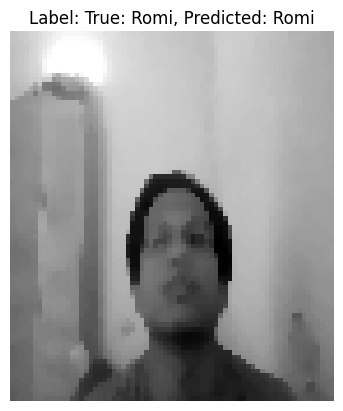

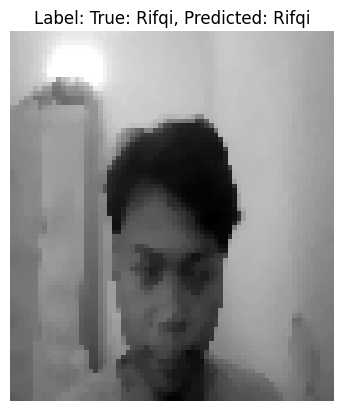

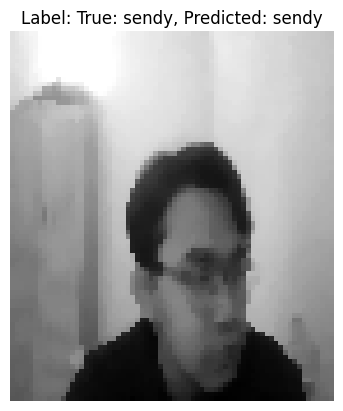

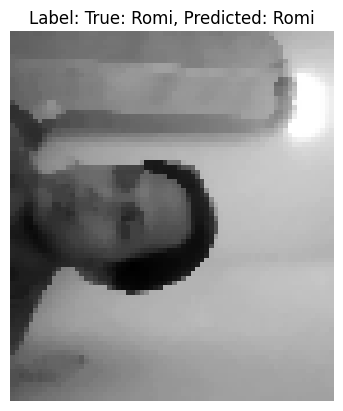

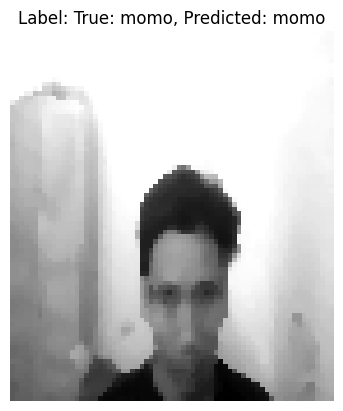

In [ ]:
import torch
import torch.nn as nn

class SqueezeExcitation(nn.Module):
    def __init__(self, input_channels, squeeze_ratio=4):
        super(SqueezeExcitation, self).__init__()
        squeeze_channels = input_channels // squeeze_ratio
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc1 = nn.Conv2d(input_channels, squeeze_channels, kernel_size=1, bias=True)
        self.relu = nn.ReLU(inplace=True)
        self.fc2 = nn.Conv2d(squeeze_channels, input_channels, kernel_size=1, bias=True)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.avg_pool(x)
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        out = x * out
        return out

class GhostModule(nn.Module):
    def __init__(self, input_channels, output_channels, kernel_size=1, ratio=2):
        super(GhostModule, self).__init__()
        internal_channels = int(output_channels / ratio)

        self.primary_conv = nn.Conv2d(input_channels, internal_channels, kernel_size, stride=1, padding=kernel_size//2, bias=False)
        self.cheap_operation = nn.Sequential(
            nn.Conv2d(internal_channels, internal_channels, kernel_size, stride=1, padding=kernel_size//2, groups=internal_channels, bias=False),
            nn.BatchNorm2d(internal_channels),
            nn.ReLU(inplace=True)
        )
        self.squeeze_excitation = SqueezeExcitation(internal_channels)

    def forward(self, x):
        primary_conv = self.primary_conv(x)
        cheap_operation = self.cheap_operation(primary_conv)
        cheap_operation = self.squeeze_excitation(cheap_operation)
        return torch.cat((primary_conv, cheap_operation), 1)

class GhostNet(nn.Module):
    def __init__(self, num_classes=8):
        super(GhostNet, self).__init__()
        self.stem = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(16),
            nn.ReLU(inplace=True)
        )

        self.stage1 = self._make_stage(16, 16, 1, 1)
        self.stage2 = self._make_stage(16, 24, 2, 2)
        self.stage3 = self._make_stage(24, 40, 2, 2)
        self.stage4 = self._make_stage(40, 80, 3, 2)
        self.stage5 = self._make_stage(80, 160, 3, 2)
        self.stage6 = self._make_stage(160, 320, 1, 1)

        self.conv7 = nn.Sequential(
            nn.Conv2d(320, 1024, kernel_size=1, stride=1, padding=0, bias=False),
            nn.BatchNorm2d(1024),
            nn.ReLU(inplace=True)
        )

        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(1024, num_classes)

    def _make_stage(self, input_channels, output_channels, num_blocks, stride):
        layers = []
        layers.append(GhostModule(input_channels, output_channels, kernel_size=3))
        for _ in range(1, num_blocks):
            layers.append(GhostModule(output_channels, output_channels))

        return nn.Sequential(*layers)

    def forward(self, x):
        out = self.stem(x)
        out = self.stage1(out)
        out = self.stage2(out)
        out = self.stage3(out)
        out = self.stage4(out)
        out = self.stage5(out)
        out = self.stage6(out)
        out = self.conv7(out)
        out = self.avgpool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)

        return out

# Contoh penggunaan GhostNet untuk data grayscale
input_shape = (1, 224, 224)  # Bentuk input gambar grayscale dalam konvensi PyTorch (channels, height, width)
num_classes = 8  # Jumlah kelas output
model = GhostNet(num_classes)
print(model)

import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt


# Tentukan hyperparameter pelatihan
learning_rate = 0.001
num_epochs = 40
batch_size = 32
num_classes = len(label_encoder.classes_)  # Ganti dengan jumlah kelas yang sesuai

# Tentukan model dan fungsi loss
model = GhostNet(num_classes)  # Ganti dengan model yang telah kamu bangun
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Buat DataLoader untuk memuat data pelatihan dalam batch
train_dataset = torch.utils.data.TensorDataset(train_images, train_labels)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Melakukan pelatihan model
model.train()
for epoch in range(num_epochs):
    running_loss = 0.0
    predictions = []
    targets = []
    for images, labels in train_loader:
        # Reset gradien optimizer
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass dan optimasi
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Prediksi dan target untuk perhitungan metrik
        _, predicted = torch.max(outputs, 1)
        predictions.extend(predicted.tolist())
        targets.extend(labels.tolist())

    # Cetak loss pada setiap epoch
    print(f"Epoch {epoch+1}: Loss = {running_loss / len(train_loader)}")

    # Hitung dan cetak metrik evaluasi
    accuracy = accuracy_score(targets, predictions)
    f1 = f1_score(targets, predictions, average='macro')
    precision = precision_score(targets, predictions, average='macro')
    recall = recall_score(targets, predictions, average='macro')
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")

# Buat DataLoader untuk memuat data pengujian dalam batch
test_dataset = torch.utils.data.TensorDataset(test_images, test_labels)  # Ganti dengan dataset pengujian Anda
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Evaluasi model pada dataset pengujian
model.eval()
test_predictions = []
test_labels_list = []

# Loop melalui setiap batch dari DataLoader pengujian
with torch.no_grad():
    for images, labels in test_loader:
        # Forward pass
        outputs = model(images)

        # Catat prediksi dan label untuk perhitungan metrik
        _, predicted = torch.max(outputs.data, 1)
        test_predictions.extend(predicted.tolist())
        test_labels_list.extend(labels.tolist())

# Menghitung metrik evaluasi pada dataset pengujian
test_accuracy = accuracy_score(test_labels_list, test_predictions)
test_f1_score = f1_score(test_labels_list, test_predictions, average='macro')
test_precision = precision_score(test_labels_list, test_predictions, average='macro')
test_recall = recall_score(test_labels_list, test_predictions, average='macro')

# Cetak hasil evaluasi pada dataset pengujian
print("Evaluation on Test Dataset:")
print(f"Accuracy = {test_accuracy}, F1 Score = {test_f1_score}, Precision = {test_precision}, Recall = {test_recall}")
# Setelah pelAturannya, jangan menambahkan data latih ke data pengujian. Namun, jika Anda ingin menambahkan beberapa data latih ke data pengujian, pastikan untuk membagi data dengan cara yang sama seperti membagi data latih dan data pengujian awal. Dengan kata lain, pastikan bahwa perbandingan kelas di data pengujian tetap seimbang dan mewakili distribusi kelas secara keseluruhan.

In [ ]:
torch.save(model.state_dict(), 'GhostNet.pt')

# **MobileNet**

In [ ]:
import torch
import torch.nn as nn
from torchvision.models import mobilenet_v2

# Membuat model MobileNet untuk data grayscale
class MobileNetGrayscale(nn.Module):
    def __init__(self, num_classes):
        super(MobileNetGrayscale, self).__init__()
        self.model = mobilenet_v2(pretrained=False)
        self.model.features[0][0] = nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1)

        # Menyesuaikan jumlah kelas di layer akhir
        self.model.classifier[1] = nn.Linear(1280, num_classes)

    def forward(self, x):
        return self.model(x)

# Inisialisasi model MobileNetGrayscale
num_classes = 8  # Ganti dengan jumlah kelas yang sesuai
model = MobileNetGrayscale(num_classes)

# Contoh penggunaan model
input_size = (1, 224, 224)  # Ubah sesuai dengan ukuran input yang diinginkan
input_data = torch.randn(1, *input_size)
output = model(input_data)
print(output.size())


torch.Size([1, 8])


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, f1_score, precision_score

# Definisikan hyperparameter pelatihan
learning_rate = 0.001
num_epochs = 20
batch_size = 32
num_classes = 8  # Ganti dengan jumlah kelas yang sesuai

# Inisialisasi model MobileNet
model = MobileNetGrayscale(num_classes)

# Definisikan fungsi loss dan optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Buat DataLoader untuk memuat data pelatihan dan pengujian dalam batch
train_dataset = torch.utils.data.TensorDataset(train_images, train_labels)  # Ganti dengan dataset pelatihan Anda
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Melakukan pelatihan model
model.train()
for epoch in range(num_epochs):
    running_loss = 0.0
    epoch_predictions = []
    epoch_labels = []

    # Loop melalui setiap batch dari DataLoader pelatihan
    for images, labels in train_loader:
        # Reset gradien optimizer
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass dan optimasi
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Catat prediksi dan label untuk perhitungan metrik
        _, predicted = torch.max(outputs.data, 1)
        epoch_predictions.extend(predicted.tolist())
        epoch_labels.extend(labels.tolist())

    # Cetak loss, akurasi, f1 score, recall, precision, dan confusion matrix pada setiap epoch
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = accuracy_score(epoch_labels, epoch_predictions)
    epoch_f1_score = f1_score(epoch_labels, epoch_predictions, average='macro')
    epoch_precision = precision_score(epoch_labels, epoch_predictions, average='macro')
    print(f"Epoch {epoch+1}: Loss = {epoch_loss}, Accuracy = {epoch_accuracy}, F1 Score = {epoch_f1_score}, Precision = {epoch_precision}")

# Buat DataLoader untuk memuat data pengujian dalam batch
test_dataset = torch.utils.data.TensorDataset(test_images, test_labels)  # Ganti dengan dataset pengujian Anda
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Evaluasi model pada dataset pengujian
model.eval()
test_predictions = []
test_labels_list = []

# Loop melalui setiap batch dari DataLoader pengujian
with torch.no_grad():
    for images, labels in test_loader:
        # Forward pass
        outputs = model(images)

        # Catat prediksi dan label untuk perhitungan metrik
        _, predicted = torch.max(outputs.data, 1)
        test_predictions.extend(predicted.tolist())
        test_labels_list.extend(labels.tolist())

# Menghitung metrik evaluasi pada dataset pengujian
test_accuracy = accuracy_score(test_labels_list, test_predictions)
test_f1_score = f1_score(test_labels_list, test_predictions, average='macro')
test_precision = precision_score(test_labels_list, test_predictions, average='macro')

# Cetak hasil evaluasi pada dataset pengujian
print("Evaluation on Test Dataset:")
print(f"Accuracy = {test_accuracy}, F1 Score = {test_f1_score}, Precision = {test_precision}")


Epoch 1: Loss = 1.9998739659786224, Accuracy = 0.19583333333333333, F1 Score = 0.19780602617594295, Precision = 0.21297457930573066
Epoch 2: Loss = 1.5053802728652954, Accuracy = 0.4041666666666667, F1 Score = 0.3456580495195961, Precision = 0.40384500864739836
Epoch 3: Loss = 0.7567560821771622, Accuracy = 0.7625, F1 Score = 0.7525451671029231, Precision = 0.7646211011627366
Epoch 4: Loss = 0.4142452944070101, Accuracy = 0.8708333333333333, F1 Score = 0.8687142700984372, Precision = 0.888826939798669
Epoch 5: Loss = 0.2952400129288435, Accuracy = 0.9, F1 Score = 0.9017683275835722, Precision = 0.905504470373422
Epoch 6: Loss = 0.24913461972028017, Accuracy = 0.9291666666666667, F1 Score = 0.928612230113516, Precision = 0.930262622725858
Epoch 7: Loss = 0.4185210457071662, Accuracy = 0.9041666666666667, F1 Score = 0.9031137732916855, Precision = 0.9117980399230399
Epoch 8: Loss = 0.5376371704041958, Accuracy = 0.825, F1 Score = 0.8224436245622492, Precision = 0.8263123448596363
Epoch 9

# **MobileNet Trial**

In [ ]:
import torch
import torch.nn as nn
from torchvision.models import mobilenet_v2

class MobileNetGrayscale(nn.Module):
    def __init__(self, num_classes):
        super(MobileNetGrayscale, self).__init__()
        self.model = mobilenet_v2(pretrained=False)

        # Mengubah lapisan konvolusi pertama
        self.model.features[0][0] = nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1)

        # Menyesuaikan jumlah kelas di layer akhir
        self.model.classifier[1] = nn.Linear(1280, num_classes)

    def forward(self, x):
        return self.model(x)


# Inisialisasi model MobileNetGrayscale
num_classes = 8
model = MobileNetGrayscale(num_classes)

# Contoh penggunaan model
input_size = (1, 224, 224)
input_data = torch.randn(1, *input_size)
output = model(input_data)
print(output.size())

import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Definisikan hyperparameter pelatihan
learning_rate = 0.001
num_epochs = 40
batch_size = 32
num_classes = 8  # Ganti dengan jumlah kelas yang sesuai

# Inisialisasi model MobileNet
model = MobileNetGrayscale(num_classes)

# Definisikan fungsi loss dan optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Buat DataLoader untuk memuat data pelatihan dan pengujian dalam batch
train_dataset = torch.utils.data.TensorDataset(train_images, train_labels)  # Ganti dengan dataset pelatihan Anda
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Melakukan pelatihan model
model.train()
for epoch in range(num_epochs):
    running_loss = 0.0
    epoch_predictions = []
    epoch_labels = []

    # Loop melalui setiap batch dari DataLoader pelatihan
    for images, labels in train_loader:
        # Reset gradien optimizer
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass dan optimasi
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Catat prediksi dan label untuk perhitungan metrik
        _, predicted = torch.max(outputs.data, 1)
        epoch_predictions.extend(predicted.tolist())
        epoch_labels.extend(labels.tolist())

    # Cetak loss, akurasi, f1 score, recall, precision, dan confusion matrix pada setiap epoch
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = accuracy_score(epoch_labels, epoch_predictions)
    epoch_f1_score = f1_score(epoch_labels, epoch_predictions, average='macro')
    epoch_precision = precision_score(epoch_labels, epoch_predictions, average='macro')
    epoch_recall = recall_score(epoch_labels, epoch_predictions, average='macro')
    print(f"Epoch {epoch+1}: Loss = {epoch_loss}, Accuracy = {epoch_accuracy}, F1 Score = {epoch_f1_score}, Precision = {epoch_precision}, Recall = {epoch_recall}")

# Buat DataLoader untuk memuat data pengujian dalam batch
test_dataset = torch.utils.data.TensorDataset(test_images, test_labels)  # Ganti dengan dataset pengujian Anda
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Evaluasi model pada dataset pengujian
model.eval()
test_predictions = []
test_labels_list = []

# Loop melalui setiap batch dari DataLoader pengujian
with torch.no_grad():
    for images, labels in test_loader:
        # Forward pass
        outputs = model(images)

        # Catat prediksi dan label untuk perhitungan metrik
        _, predicted = torch.max(outputs.data, 1)
        test_predictions.extend(predicted.tolist())
        test_labels_list.extend(labels.tolist())

# Menghitung metrik evaluasi pada dataset pengujian
test_accuracy = accuracy_score(test_labels_list, test_predictions)
test_f1_score = f1_score(test_labels_list, test_predictions, average='macro')
test_precision = precision_score(test_labels_list, test_predictions, average='macro')
test_recall = recall_score(test_labels_list, test_predictions, average='macro')

# Cetak hasil evaluasi pada dataset pengujian
print("Evaluation on Test Dataset:")
print(f"Accuracy = {test_accuracy}, F1 Score = {test_f1_score}, Precision = {test_precision}, Recall = {test_recall}")



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


torch.Size([1, 8])
Epoch 1: Loss = 2.0778775066137314, Accuracy = 0.20416666666666666, F1 Score = 0.18531416483191432, Precision = 0.20256205576856243, Recall = 0.19653974259786272
Epoch 2: Loss = 1.4290448427200317, Accuracy = 0.5291666666666667, F1 Score = 0.5060514019112632, Precision = 0.5684118825902713, Recall = 0.5188212259488351
Epoch 3: Loss = 0.786224901676178, Accuracy = 0.7416666666666667, F1 Score = 0.7388861310112973, Precision = 0.7556993069747142, Recall = 0.7377310748908276
Epoch 4: Loss = 0.40524337999522686, Accuracy = 0.8666666666666667, F1 Score = 0.868449567545243, Precision = 0.8738470175868756, Recall = 0.8694103846581271
Epoch 5: Loss = 0.18575485050678253, Accuracy = 0.9333333333333333, F1 Score = 0.9337812988207557, Precision = 0.9385763422401354, Recall = 0.9313400571743176
Epoch 6: Loss = 0.1812793263234198, Accuracy = 0.9625, F1 Score = 0.9620830196922012, Precision = 0.9621352364252462, Recall = 0.963133994623231
Epoch 7: Loss = 0.16981642320752144, Accur

Epoch 1: Loss = 2.013596475124359, Accuracy = 0.22083333333333333, F1 Score = 0.21083397877405838, Precision = 0.3073209482418083, Recall = 0.2136279639101402
Epoch 2: Loss = 1.3452610224485397, Accuracy = 0.5458333333333333, F1 Score = 0.508972769672869, Precision = 0.6267723420060627, Recall = 0.5334487230527766
Epoch 3: Loss = 0.7639777436852455, Accuracy = 0.7833333333333333, F1 Score = 0.7828174027811697, Precision = 0.7933494792901487, Recall = 0.7803188700284329
Epoch 4: Loss = 0.38657487742602825, Accuracy = 0.8958333333333334, F1 Score = 0.8958444982061446, Precision = 0.9035776499486177, Recall = 0.8939604109584643
Epoch 5: Loss = 0.27663485426455736, Accuracy = 0.9041666666666667, F1 Score = 0.9037611592217747, Precision = 0.9043365396075005, Recall = 0.9054879818412012
Epoch 6: Loss = 0.24881551042199135, Accuracy = 0.9125, F1 Score = 0.9112611542616319, Precision = 0.916877787718305, Recall = 0.9100313776649411
Epoch 7: Loss = 0.27584611251950264, Accuracy = 0.870833333333

In [ ]:
#torch.save(model.state_dict(), 'MobileNet.pt')
